<a href="https://colab.research.google.com/github/muskan-cloud/Learning-NLP/blob/main/Bag_of_words_Countvectorizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

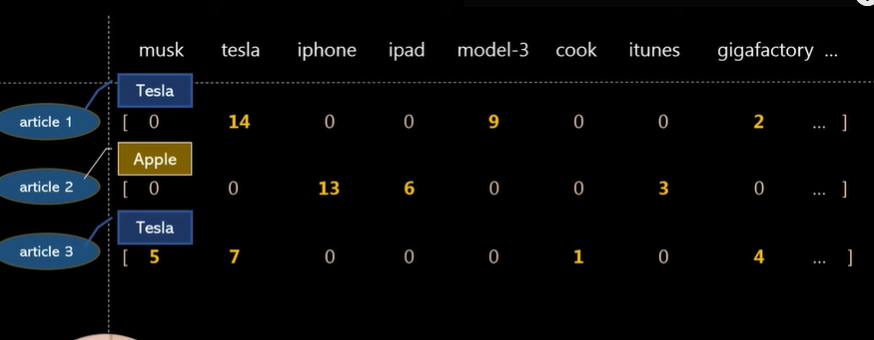

In [3]:
import pandas as pd
import numpy as np

In [7]:
# https://github.com/codebasics/nlp-tutorials/blob/main/9_bag_of_words/spam.csv

In [6]:
df  = pd.read_csv("/spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.Category.value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [9]:
df["spam"] = df["Category"].apply(lambda x: 1 if x == "spam" else 0)

In [11]:
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train , X_test , y_train ,y_test = train_test_split(df.Message , df.spam , test_size = 0.2)
X_train.shape , X_test.shape

((4457,), (1115,))

In [17]:
X_train[:4][1631]

'I am going to film 2day da. At 6pm. Sorry da.'

In [19]:
y_train[:4]

1631    0
4665    0
3908    0
607     1
Name: spam, dtype: int64

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer()

X_train_cv = v.fit_transform(X_train.values)
X_train_cv.toarray()[:2][0]

array([0, 0, 0, ..., 0, 0, 0])

In [23]:
X_train_cv.shape

(4457, 7696)

In [27]:
v.get_feature_names_out().shape

(7696,)

In [28]:
dir(v)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_char_ngrams',
 '_char_wb_ngrams',
 '_check_feature_names',
 '_check_n_features',
 '_check_stop_words_consistency',
 '_check_vocabulary',
 '_count_vocab',
 '_get_param_names',
 '_get_tags',
 '_limit_features',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sort_features',
 '_stop_words_id',
 '_validate_data',
 '_validate_ngram_range',
 '_validate_params',
 '_validate_vocabulary',
 '_warn_for_unused_params',
 '_white_spaces',
 '_word_ngrams',
 'analyzer',
 'binary',
 'build_analyzer',
 'build_preprocessor',
 'bui

In [29]:
v.vocabulary_

{'am': 941,
 'going': 3147,
 'to': 6883,
 'film': 2823,
 '2day': 385,
 'da': 2134,
 'at': 1123,
 '6pm': 599,
 'sorry': 6303,
 'mum': 4612,
 'not': 4799,
 'robinson': 5774,
 'already': 929,
 'no': 4763,
 'that': 6771,
 'just': 3843,
 'means': 4383,
 'you': 7658,
 'have': 3338,
 'fat': 2761,
 'head': 3345,
 'xclusive': 7599,
 'clubsaisai': 1858,
 '2morow': 399,
 '28': 376,
 'soiree': 6265,
 'speciale': 6336,
 'zouk': 7694,
 'with': 7496,
 'nichols': 4740,
 'from': 2990,
 'paris': 5058,
 'free': 2955,
 'roses': 5793,
 'all': 918,
 'ladies': 3963,
 'info': 3642,
 '07946746291': 40,
 '07880867867': 38,
 'happy': 3318,
 'birthday': 1367,
 'dear': 2183,
 'lots': 4186,
 'of': 4865,
 'love': 4197,
 'rakhesh': 5530,
 'nri': 4817,
 've': 7208,
 'sent': 5993,
 'my': 4637,
 'part': 5063,
 'come': 1906,
 'medical': 4389,
 'college': 1897,
 '7pm': 626,
 'forward': 2935,
 'it': 3727,
 'ready': 5571,
 'then': 6784,
 'call': 1601,
 'me': 4376,
 'sure': 6590,
 'was': 7340,
 'checking': 1751,
 'out': 4980

In [32]:
v.get_feature_names_out()[6408]

'stamps'

In [34]:
X_train_np = X_train_cv.toarray()
np.where(X_train_np[0]!=0)

(array([ 385,  599,  941, 1123, 2134, 2823, 3147, 6303, 6883]),)

In [41]:
X_train[:4][4665]

'Mum not going robinson already.'

In [42]:
X_train_np[0][941]

1

In [44]:
v.get_feature_names_out()[6303]

'sorry'

In [46]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_cv,y_train)
model.score(X_train_cv,y_train)

0.9939421135292797

In [47]:
X_test_cv = v.transform(X_test)

In [50]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test_cv)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       967
           1       0.94      0.89      0.91       148

    accuracy                           0.98      1115
   macro avg       0.96      0.94      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [51]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]

emails_count = v.transform(emails)
model.predict(emails_count)

array([0, 1])

In [52]:
from sklearn.pipeline import Pipeline
clf = Pipeline([('vectorizer' , CountVectorizer()),
                ("nb" , MultinomialNB())])
clf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [53]:
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       967
           1       0.94      0.89      0.91       148

    accuracy                           0.98      1115
   macro avg       0.96      0.94      0.95      1115
weighted avg       0.98      0.98      0.98      1115

